In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot space as inline for inline plots display
%matplotlib inline

pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 30)

### Losses Categorized by Domestic only, Foreign Only, and Unreleased Pie Chart!!!!

In [2]:
df_rt_budget = pd.read_csv('data/tn.movie_budgets_working.csv') # utf-8 is default

In [3]:
df_rt_budget.columns

Index(['Unnamed: 0', 'id', 'release_date', 'movie', 'production_budget',
       'domestic_gross', 'worldwide_gross', 'foreign_gross', 'PnL'],
      dtype='object')

In [4]:
df_rt_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
Unnamed: 0           5782 non-null int64
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
foreign_gross        5782 non-null int64
PnL                  5782 non-null int64
dtypes: int64(7), object(2)
memory usage: 406.7+ KB


In [5]:
df_rt_budget.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [6]:
df = df_rt_budget

In [7]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747


In [73]:
df['profit'] = df['PnL'] > 0

In [74]:
df['profit'].value_counts()

True     3657
False    2125
Name: profit, dtype: int64

In [10]:
df.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


### Drop index column _Unamed: 0_

In [11]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [1]:
# do not rerun !!!!!!!!!!!!!
#df.to_csv('data/boxoffice_profit.csv')

## Graph domestic gross for profits and losses (stacked bar) based on revenue range, the the same for foreign

In [12]:
df_bo_pnl = pd.read_csv('data/boxoffice_profit.csv')

In [26]:
df_bo_pnl.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,2351345279,True
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,635063875,True
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-200237650,False
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,1072413963,True
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,999721747,True


In [27]:
df_bo_pnl.profit.value_counts()

True     3657
False    2125
Name: profit, dtype: int64

In [33]:
df_bo_pnl[(df_bo_pnl['foreign_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
341,341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0,-106900000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
505,505,6,"Nov 22, 2000",102 Dalmatians,85000000,66941559,66941559,0,-18058441,False
...,...,...,...,...,...,...,...,...,...,...
5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0,-6100,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,False
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,False


In [36]:
df_bo_pnl[(df_bo_pnl['domestic_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
617,617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,60680125,-16919875,False
...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,False
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,False
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False


In [35]:
df_bo_pnl[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] == 0)]

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
670,670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,0,-75000000,False
...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,False
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,False
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,False
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,False


In [88]:
df_bo_pnl_un_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] == 0) & (~df_bo_pnl['profit'])]

In [89]:
df_bo_pnl_un_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,False
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,False
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,False
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,False
670,670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,0,-75000000,False


In [84]:
df_bo_pnl_notfor_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] != 0) & (df_bo_pnl['foreign_gross'] == 0) & (~df_bo_pnl['profit'])]

In [85]:
df_bo_pnl_notfor_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
341,341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,0,-106900000,False
505,505,6,"Nov 22, 2000",102 Dalmatians,85000000,66941559,66941559,0,-18058441,False
515,515,16,"Nov 13, 1998",Meet Joe Black,85000000,44650003,44650003,0,-40349997,False
584,584,85,"Dec 25, 1998",Mighty Joe Young,80000000,50632037,50632037,0,-29367963,False
659,659,60,"Dec 17, 1999",Anna and the King,75000000,39251128,39251128,0,-35748872,False


In [91]:
df_bo_pnl_notfor_agg.PnL.sum()

-6741494633

In [86]:
df_bo_pnl_notdom_agg = df_bo_pnl.loc[(df_bo_pnl['domestic_gross'] == 0) & (df_bo_pnl['foreign_gross'] != 0) & (~df_bo_pnl['profit'])]

In [87]:
df_bo_pnl_notdom_agg.head()

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,PnL,profit
617,617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,60680125,-16919875,False
619,619,20,"Jan 22, 2019",Renegades,77500000,0,1521672,1521672,-75978328,False
820,820,21,"Oct 26, 2018",Air Strike,65000000,0,516279,516279,-64483721,False
1325,1325,26,"Dec 31, 2012",Foodfight!,45000000,0,73706,73706,-44926294,False
1368,1368,69,"Dec 31, 2015",Pourquoi j'ai pas mangÃ© mon pÃ¨re,42000000,0,15451663,15451663,-26548337,False


In [95]:
losses = [(df_bo_pnl_notdom_agg.PnL.sum()), (df_bo_pnl_notfor_agg.PnL.sum()), (df_bo_pnl_un_agg.PnL.sum())]

In [96]:
losses

[-1317770255, -6741494633, -2277558580]

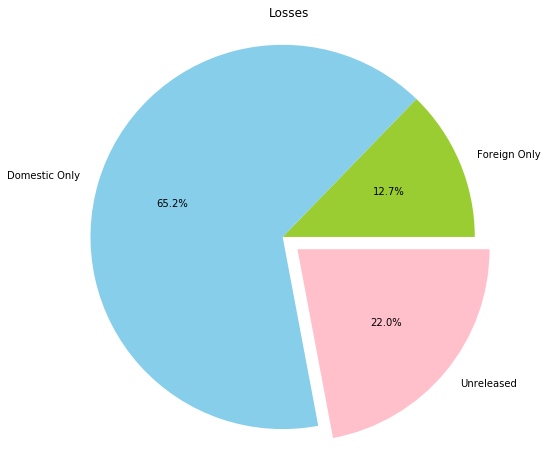

In [126]:
categories = ['Foreign Only', 'Domestic Only', 'Unreleased']
losses = [abs(df_bo_pnl_notdom_agg.PnL.sum()), abs(df_bo_pnl_notfor_agg.PnL.sum()), abs(df_bo_pnl_un_agg.PnL.sum())]
colors = ['yellowgreen', 'skyblue', 'pink']
explode = (0, 0, 0.1)

plt.figure(figsize=(10,8))
plt.pie(losses, explode=explode, labels=categories, autopct='%1.1f%%', colors=colors, shadow=False)

plt.axis('scaled')
plt.title('Losses')


plt.show()
#plt.savefig("data/losses_pie_chart.jpeg")
# saves the image to the directory